### Import tools

In [29]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

# Import tools from this project
from Code.descent_methods import *
from Code.utilities import train_test_split, plot_test_results
from Code.activation_functions import sigmoid
from Code.neural_network import neural_network_train, neural_network_model

# Import tools from the first project 
from Code.project1_tools import feature_matrix_2d, r2_sampling

# Import other libraries
import numpy as np
from matplotlib import pyplot as plt

### Sampling data

In [30]:
# Sample points and split in train and test
num_points = 100
data = r2_sampling(num_points, sigma2=0)
x, y, z = data["x"], data["y"], data["z"]

# Feature matrix with x and y coordinate of franke function
X = np.array([np.array([x[i][0], y[i][0]]) for i in range(len(x))]) # Have to use [0] since r2_sampling returns list of singleton lists

# Split into train and test
X_train, y_train, X_test, y_test, test_index = train_test_split(X, z, 0.2)

### Basic epoch experiment for some methods

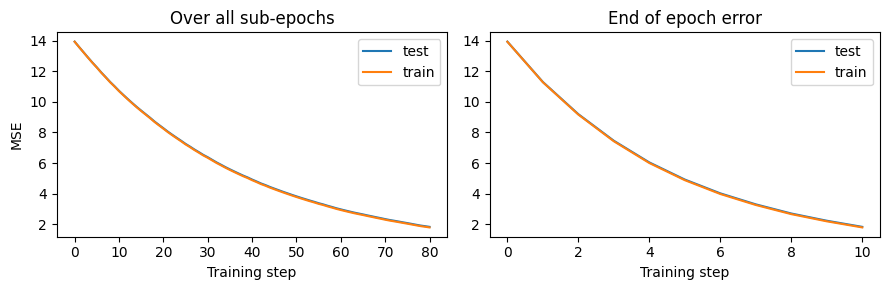

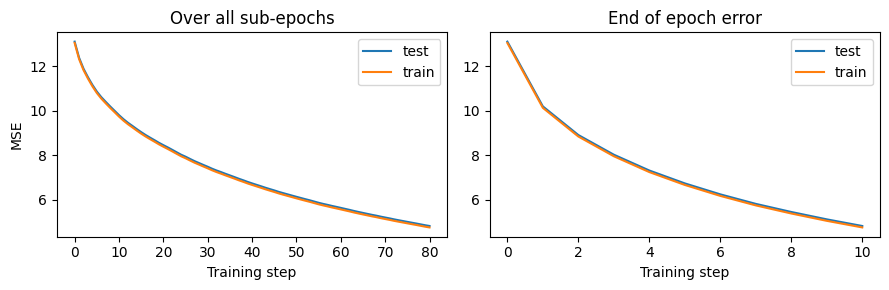

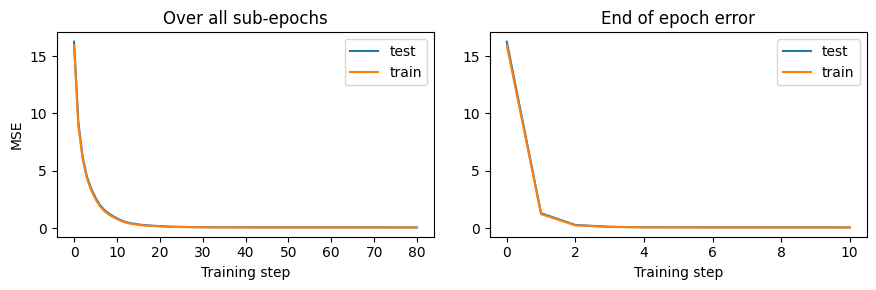

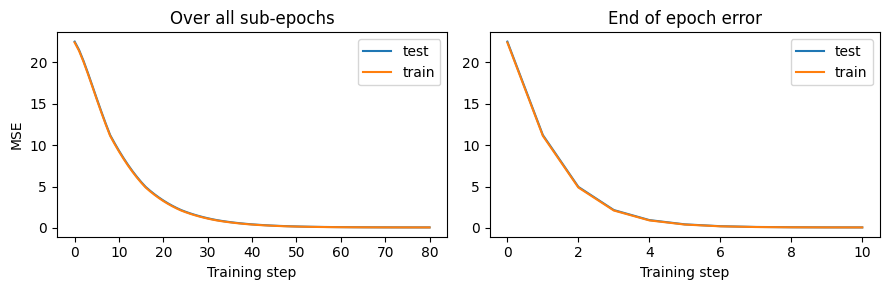

In [31]:
n_epochs = 10
batch_size = 10
num_batches = int(len(y_train) / batch_size)
lr = 0.01 # Initial learning rate
gamma = 0 # Momentum

### TODO: missing compatability with plain method...
for method in [SGD, SGD_adagrad, SGD_RMS_prop, SGD_adam]:
    result = neural_network_train(X_train, y_train, X_test, y_test, 
                                  batch_size=batch_size, 
                                  n_epochs=n_epochs,
                                  lr=lr, gamma=gamma,
                                  descent_method=method)
    plot_test_results(result["test_loss_list"], result["train_loss_list"], num_batches)

### Batch size experiment

In [39]:
# NB this function uses global variables (:

def experiment_nn_batch_size(descent_metod = SGD_adam, n_epochs_list=[5, 10]):
    # Set parametres for experiment
    batch_sizes = [i for i in range(1, X_train.shape[0])]
    lr = 0.01 # Initial learning rate
    gamma = 0 # Momentum

    # Make plot
    fig, axs = plt.subplots(len(n_epochs_list), 1, figsize=(6, 3*len(n_epochs_list)))  # n row, 1 columns

    # Lists for storing final error
    test_list_dict = {f"{n}" : [] for n in n_epochs_list}
    train_list_dict = {f"{n}" : [] for n in n_epochs_list}

    for bs in batch_sizes:
        result = neural_network_train(X_train, y_train, X_test, y_test, 
                                    batch_size=bs, 
                                    n_epochs=max(n_epochs_list), # The maximal duration contains the rest
                                    lr = lr, 
                                    gamma=gamma,
                                    descent_method=descent_metod)
        
        num_batches = int(X_train.shape[0] / bs)
        
        for n in n_epochs_list:      
            test_list_dict[f"{n}"].append(result["test_loss_list"][n*num_batches])
            train_list_dict[f"{n}"].append(result["train_loss_list"][n*num_batches])

    # Make axs list if only one ... # quickfix (:
    if len(n_epochs_list) == 1:
        axs = [axs] 
    for i, n in enumerate(n_epochs_list):
        axs[i].plot(batch_sizes, test_list_dict[f"{n}"], label="test")
        axs[i].plot(batch_sizes, train_list_dict[f"{n}"], label="train")
        axs[i].set(xlabel = "batch size", ylabel = "MSE", title = f"Final error over various batch sizes for {n} epochs")
    axs[0].legend()

    plt.tight_layout()
    plt.show()

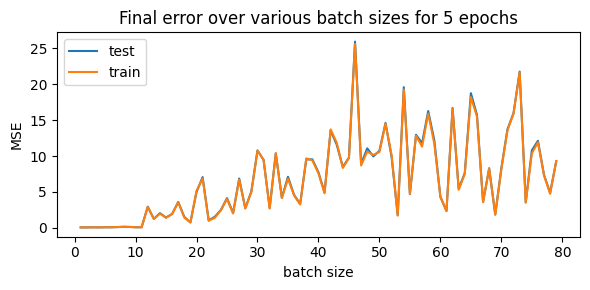

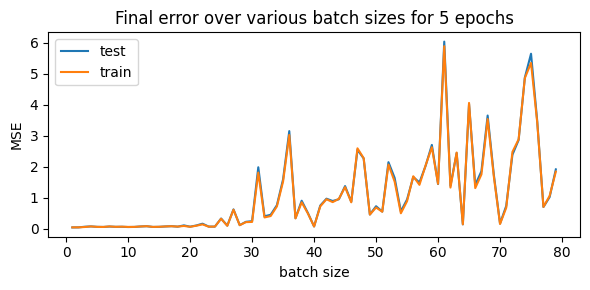

In [40]:
experiment_nn_batch_size(descent_metod = SGD_adam, n_epochs_list=[5])
experiment_nn_batch_size(descent_metod = SGD_RMS_prop, n_epochs_list=[5])